In [12]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

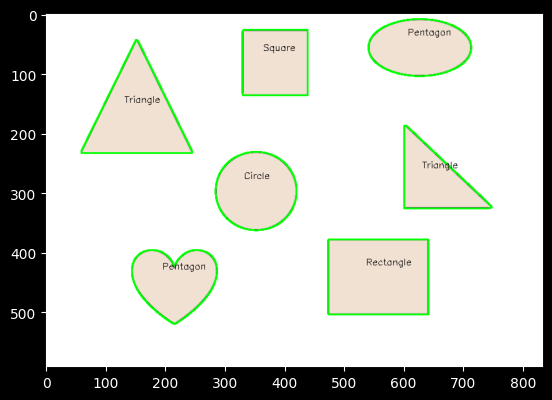

In [32]:
import cv2
import numpy as np

def detect_shapes(image_path):
    # Load the image
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    edged = cv2.Canny(blurred, 50, 150)

    # Find contours in the edged image
    contours, _ = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    for contour in contours:
        # Approximate the contour
        peri = cv2.arcLength(contour, True)
        approx = cv2.approxPolyDP(contour, 0.04 * peri, True)

        # Determine the shape based on the number of vertices
        shape = "unidentified"
        vertices = len(approx)

        if vertices == 3:
            shape = "Triangle"
        elif vertices == 4:
            (x, y, w, h) = cv2.boundingRect(approx)
            aspect_ratio = w / float(h)
            shape = "Square" if 0.95 <= aspect_ratio <= 1.05 else "Rectangle"
        elif vertices == 5:
            shape = "Pentagon"
        elif vertices == 6:
            shape = "Hexagon"
        else:
            # Check if it is a circle or an oval
            area = cv2.contourArea(contour)
            ((x, y), radius) = cv2.minEnclosingCircle(contour)
            circle_area = np.pi * (radius ** 2)
            if 0.8 <= area / circle_area <= 1.2:
                shape = "Circle"
            else:
                # If it's not a circle, assume it's an oval or a generic polygon
                major_axis_length = max(w, h)
                minor_axis_length = min(w, h)
                eccentricity = np.sqrt(1 - (minor_axis_length / major_axis_length) ** 2)
                shape = "Oval" if eccentricity < 0.75 else "Polygon"

        # Compute the center of the contour and draw the shape name on the image
        M = cv2.moments(contour)
        if M["m00"] != 0:
            cX = int(M["m10"] / M["m00"])
            cY = int(M["m01"] / M["m00"])
        cv2.drawContours(image, [contour], -1, (0, 255, 0), 2)
        cv2.putText(image, shape, (cX - 20, cY - 20), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 1)

    # Save the output image
    plt.imshow(image)

# Example usage:
image_path = 'shapes3.png'  # Replace with your input image path
detect_shapes(image_path)
